# TO DO
- After running the model: make the graph weighted with the traffic
- Calculate vulnerability
- Calculate criticality

In [35]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from operator import itemgetter

In [36]:
G = nx.Graph()

df = pd.read_csv("../data/processed/N1_N2_plus_sideroads.csv")

In [37]:
df.head()

index road       id  model_type condition   name        lat        lon  \
0      0   N1  1000000  sourcesink       NaN  SoSi1  23.706028  90.443333   
1      2   N1  1000002        link       NaN    NaN  23.702778  90.450472   
2      4   N1  1000004      bridge         A    NaN  23.698739  90.458861   
3      7   N1  1000007        link       NaN    NaN  23.693833  90.469138   
4     10   N1  1000010      bridge         A    NaN  23.694664  90.487775   

   length           bridge_name        in      out  
0     0.0                   NaN  0.319244  0.28693  
1  1000.0                   NaN       NaN      NaN  
2    11.3  bridge at id 1000004       NaN      NaN  
3  3175.0                   NaN       NaN      NaN  
4     6.6  bridge at id 1000010       NaN      NaN

In [38]:
for i, row in df.iterrows():
    G.add_node(row['id'], pos=[row['lon'],row['lat']]) # add all nodes from id

# add edges between all nodes on a road. Intersections have the same id, so will be connected this way too.
p_row = None
for i, row in df.iterrows():
    if p_row is not None:
        if p_row['road'] == row['road']:
            G.add_edge(p_row['id'], row['id'], weight=row['length'])
    p_row = row

In [39]:
path_ids_dict = {}

In [40]:
def set_lat_lon_bound(lat_min, lat_max, lon_min, lon_max, edge_ratio=0.02):
    """
    Set the HTML continuous space canvas bounding box (for visualization)
    give the min and max latitudes and Longitudes in Decimal Degrees (DD)

    Add white borders at edges (default 2%) of the bounding box
    """

    lat_edge = (lat_max - lat_min) * edge_ratio
    lon_edge = (lon_max - lon_min) * edge_ratio

    x_max = lon_max + lon_edge
    y_max = lat_min - lat_edge
    x_min = lon_min - lon_edge
    y_min = lat_max + lat_edge
    return y_min, y_max, x_min, x_max

In [41]:
# a list of names of roads to be generated
roads = df['road'].unique().tolist() 

df_objects_all = []

for road in roads:
    # Select all the objects on a particular road in the original order as in the cvs
    df_objects_on_road = df[df['road'] == road]

    if not df_objects_on_road.empty:
        df_objects_all.append(df_objects_on_road)

        """
        Set the path 
        1. get the serie of object IDs on a given road in the cvs in the original order
        2. add the (straight) path to the path_ids_dict
        3. put the path in reversed order and reindex
        4. add the path to the path_ids_dict so that the vehicles can drive backwards too
        """
        path_ids = df_objects_on_road['id']
        path_ids.reset_index(inplace=True, drop=True)
        path_ids_dict[path_ids[0], path_ids.iloc[-1]] = path_ids
        path_ids_dict[path_ids[0], None] = path_ids
        path_ids = path_ids[::-1]
        path_ids.reset_index(inplace=True, drop=True)
        path_ids_dict[path_ids[0], path_ids.iloc[-1]] = path_ids
        path_ids_dict[path_ids[0], None] = path_ids

# put back to df with selected roads so that min and max and be easily calculated
df = pd.concat(df_objects_all)
y_min, y_max, x_min, x_max = set_lat_lon_bound(
    df['lat'].min(),
    df['lat'].max(),
    df['lon'].min(),
    df['lon'].max(),
    0.05
)

In [42]:
pos = nx.get_node_attributes(G,'pos')

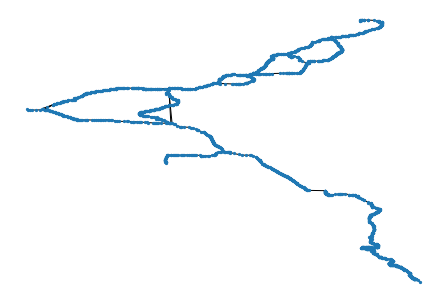

In [43]:
nx.draw(G, pos = pos, with_labels = False, node_size = 5)

In [44]:
for i in df.loc[df['model_type']=='sourcesink']['id']:
    print(i)

1000000
1001554
1001782
1001783
1001913
1002876


In [45]:
Betw_centr_1000000 = nx.betweenness_centrality_subset(G, [1000000], [1001554,1001782,1001783,1001913,1002876], normalized=True, weight=None)
Betw_centr_1001554 = nx.betweenness_centrality_subset(G, [1001554], [1000000,1001782,1001783,1001913,1002876], normalized=True, weight=None)
Betw_centr_1001782 = nx.betweenness_centrality_subset(G, [1001782], [1000000,1001554,1001783,1001913,1002876], normalized=True, weight=None)
Betw_centr_1001783 = nx.betweenness_centrality_subset(G, [1001783], [1000000,1001554,1001782,1001913,1002876], normalized=True, weight=None)
Betw_centr_1001913 = nx.betweenness_centrality_subset(G, [1001913], [1000000,1001554,1001782,1001783,1002876], normalized=True, weight=None)
Betw_centr_1002876 = nx.betweenness_centrality_subset(G, [1002876], [1000000,1001554,1001782,1001783,1001913], normalized=True, weight=None)

In [46]:
Betw_centr_1000000

{1000000: 0.0,
 1000002: 9.080900287719245e-07,
 1000004: 9.080900287719245e-07,
 1000007: 9.080900287719245e-07,
 1000010: 9.080900287719245e-07,
 1000013: 9.080900287719245e-07,
 1000017: 9.080900287719245e-07,
 1000018: 9.080900287719245e-07,
 1001932: 9.080900287719245e-07,
 1000020: 7.264720230175396e-07,
 1000021: 7.264720230175396e-07,
 1000022: 7.264720230175396e-07,
 1000023: 7.264720230175396e-07,
 1000024: 7.264720230175396e-07,
 1000025: 7.264720230175396e-07,
 1000026: 7.264720230175396e-07,
 1000028: 7.264720230175396e-07,
 1000029: 7.264720230175396e-07,
 1000030: 7.264720230175396e-07,
 1000031: 7.264720230175396e-07,
 1000033: 7.264720230175396e-07,
 1000034: 7.264720230175396e-07,
 1000035: 7.264720230175396e-07,
 1000036: 7.264720230175396e-07,
 1000038: 7.264720230175396e-07,
 1000040: 7.264720230175396e-07,
 1000042: 7.264720230175396e-07,
 1000045: 7.264720230175396e-07,
 1000047: 7.264720230175396e-07,
 1000049: 7.264720230175396e-07,
 1000050: 7.264720230175396e

In [48]:
Betw_centr_1000000

{1000000: 0.0,
 1000002: 9.080900287719245e-07,
 1000004: 9.080900287719245e-07,
 1000007: 9.080900287719245e-07,
 1000010: 9.080900287719245e-07,
 1000013: 9.080900287719245e-07,
 1000017: 9.080900287719245e-07,
 1000018: 9.080900287719245e-07,
 1001932: 9.080900287719245e-07,
 1000020: 7.264720230175396e-07,
 1000021: 7.264720230175396e-07,
 1000022: 7.264720230175396e-07,
 1000023: 7.264720230175396e-07,
 1000024: 7.264720230175396e-07,
 1000025: 7.264720230175396e-07,
 1000026: 7.264720230175396e-07,
 1000028: 7.264720230175396e-07,
 1000029: 7.264720230175396e-07,
 1000030: 7.264720230175396e-07,
 1000031: 7.264720230175396e-07,
 1000033: 7.264720230175396e-07,
 1000034: 7.264720230175396e-07,
 1000035: 7.264720230175396e-07,
 1000036: 7.264720230175396e-07,
 1000038: 7.264720230175396e-07,
 1000040: 7.264720230175396e-07,
 1000042: 7.264720230175396e-07,
 1000045: 7.264720230175396e-07,
 1000047: 7.264720230175396e-07,
 1000049: 7.264720230175396e-07,
 1000050: 7.264720230175396e